<img align="center" style="padding-right:10px;" src="Figuras/IP-01-fig_01.png">

# INSTRUÇÃO PRÁTICA - IP-P010
## PP - PROGRAMAÇÃO EM PYTHON
### OBJETIVOS DA ATIVIDADE

Revisar e consolidar o conteúdo de __Pandas__ e visualização de dados avançado.

__Exercício 1: Gerando o DataFrame__

* No link do [Faker](https://faker.readthedocs.io/en/master/#) está disponível a documentação deste pacote que permite gerar dados falsos. Para instalação do pacote basta fazer um

In [ ]:
#pip install faker
#python -m faker cpf

Desta forma fica disponível o script ``faker`` e o módulo para geração de dados falsos.

Utilizando este módulo, fere um data frame contendo as seguintes colunas

- CPF;
- Nme;
- Idade (entre 18 e 28);
- Sexo;
- Endereço de email;
- Nota no ENEM (entre 640 e 800)
- Abandono (True o False)
- Qual semestre (entre 1 e 8, se Abandono for True)
- CRA após o segundo semestre (float entre 5 e 10)
- CRA após o quarto semestre (float entre 5 e 10)
- CRA após o Sexto semestre (float entre 5 e 10)

In [1]:
import csv
import numpy as np
import pandas as pd
import random as random
from faker import Faker
fake = Faker('pt_BR')

#criação de series

# Criação
sexo=[]
nome=[]
for i in range(1000):
    sexo.append(random.choice(['M', 'F']))
    if sexo[i] == 'M':
        nome.append(fake.name_male())
    else:
        nome.append(fake.name_female())

#for i in range(1000):
##    print(sexoMasc[i], nome[i])

cpf=[]
for i in range(1000):
    cpf.append(fake.cpf())
#print(cpf)

idade=[]
for i in range(1000):
    idade.append(random.randint(18, 28))
#print(idade)

email=[]
for i in range(1000):
    email.append(fake.email())
#print(email)

enem=[]
for i in range(1000):
    enem.append(random.randint(640, 800))
#print(enem)

abandono=[]
abandonoSemestre=np.full((1000), np.nan)
cra_apos2=np.full((1000), np.nan)
cra_apos4=np.full((1000), np.nan)
cra_apos6=np.full((1000), np.nan)

for i in range(1000):
    abandono.append(random.choice([True, False]))

#print(abandono)
for i in range(1000):
    
    if abandono[i] == True:
        #print(abandono[i],":",str(i))
        abandonoSemestre[i] = random.randint(1, 7)
        if abandonoSemestre[i] >2:
            cra_apos2[i] = random.uniform(5, 10)
        else: 
            cra_apos2[i] = 0
        
        if abandonoSemestre[i] > 4:#  and abandonoSemestre[i] <= 4:
            cra_apos4[i] = random.uniform(5, 10)
        else:
            cra_apos4[i] = 0

        if abandonoSemestre[i] > 6:#4 and abandonoSemestre[i] <= 6:
            cra_apos6[i] = random.uniform(5, 10)
        else:
            cra_apos6[i] = 0
    else:
        #print(i)
        abandonoSemestre[i] = 0
        cra_apos2[i] = random.uniform(5, 10)
        cra_apos4[i] = random.uniform(5, 10)
        cra_apos6[i] = random.uniform(5, 10)

#print(abandono)

dataframe=pd.DataFrame({'Nome':nome, 'Sexo':sexo, 'CPF':cpf, 'Idade':idade, 'Email':email, 'ENEM':enem, 'Abandono':abandono, 'AbandonoSemestre':abandonoSemestre, 'CRA_apos2':cra_apos2, 'CRA_apos4':cra_apos4, 'CRA_apos6':cra_apos6})

print(dataframe)
dataframe.to_csv('dataframe.csv', index=False)


                      Nome Sexo             CPF  Idade  \
0        Luiz Miguel Alves    M  760.258.941-67     21   
1    Luiz Henrique Ribeiro    M  936.587.120-40     23   
2        Ana Beatriz Porto    F  679.158.243-09     18   
3           Isis Fernandes    F  269.807.341-13     25   
4           Helena Moreira    F  432.750.691-52     20   
..                     ...  ...             ...    ...   
995      Valentina da Rosa    F  078.945.231-60     23   
996         Kamilly Santos    F  236.710.849-87     27   
997          Stella Aragão    F  913.754.206-07     26   
998       Sra. Raquel Melo    F  597.840.361-93     28   
999        Daniela Barbosa    F  168.479.503-66     27   

                         Email  ENEM  Abandono  AbandonoSemestre  CRA_apos2  \
0          lda-luz@example.com   755      True               1.0   0.000000   
1     moreiraluana@example.com   778     False               0.0   9.845495   
2      ramosraquel@example.com   797      True               5.0  

Com o DataFrame criado, guarde os dados num arquivo ``csv``e envie para um colega.

Carregue os dados gerados pelo seu colega do arquivo ``csv`` e, com os dados do DataFrame

1. Identifique qual q relação de alunos de sexo masculino e feminino no conjunto.
2. Dado que os alunos tem idade entre 18 e 28 anos, mostre qual a média da nota do ENEM dos alunos agrupados por idade.
3. Normalize as notas do ENEM de todos os alunos para um valor entre 5 e 10.
4. Faça um gráfico de evolução das notas, desde o ENEM até CRA do sexto semestre para os 10 alunos com melhor CRA no sexto semestre. Utilize a nota do ENEM normalizada. coloque no gráfico círculos se o aluno for de sexo feminino e quadrados se for masculino.   

Carregue os dados gerados pelo seu colega do arquivo ``csv`` e, com os dados do DataFrame


In [2]:
import numpy as np
import pandas as pd

dataframe = pd.read_csv('dataframe.csv')



1. Identifique qual q relação de alunos de sexo masculino e feminino no conjunto.


In [3]:
print('#Identifique qual q relação de alunos de sexo masculino e feminino no conjunto.')
print(dataframe['Sexo'].value_counts())
print(dataframe['Sexo'].value_counts(normalize=True)*100)


#Identifique qual q relação de alunos de sexo masculino e feminino no conjunto.
Sexo
M    502
F    498
Name: count, dtype: int64
Sexo
M    50.2
F    49.8
Name: proportion, dtype: float64


2. Dado que os alunos tem idade entre 18 e 28 anos, mostre qual a média da nota do ENEM dos alunos agrupados por idade.


In [4]:
print('#Dado que os alunos tem idade entre 18 e 28 anos, mostre qual a média da nota do ENEM dos alunos agrupados por idade.')
grupo_idade_enem=dataframe.groupby('Idade')['ENEM'].mean()
print(grupo_idade_enem)


#Dado que os alunos tem idade entre 18 e 28 anos, mostre qual a média da nota do ENEM dos alunos agrupados por idade.
Idade
18    722.372340
19    717.314607
20    720.074074
21    720.910112
22    717.048780
23    721.644737
24    715.790698
25    720.315789
26    721.177083
27    719.975904
28    728.362745
Name: ENEM, dtype: float64


3. Normalize as notas do ENEM de todos os alunos para um valor entre 5 e 10.


In [5]:
print('Normalize as notas do ENEM de todos os alunos para um valor entre 5 e 10.')
norm= (dataframe['ENEM']/dataframe['ENEM'].abs().max())*5+5
print(norm)

Normalize as notas do ENEM de todos os alunos para um valor entre 5 e 10.
0      9.71875
1      9.86250
2      9.98125
3      9.01875
4      9.24375
        ...   
995    9.16875
996    9.02500
997    9.13125
998    9.35625
999    9.98125
Name: ENEM, Length: 1000, dtype: float64


4. Faça um gráfico de evolução das notas, desde o ENEM até CRA do sexto semestre para os 10 alunos com melhor CRA no sexto semestre. Utilize a nota do ENEM normalizada. coloque no gráfico círculos se o aluno for de sexo feminino e quadrados se for masculino.   

Foi criada coluna ENEM Norm com as notas do ENEM normalizadas.
top 10 ENEM Norm Feminino
Topo 10 ENEM Norm Masculino
Mostre os 10 alunos do sexo feminino com as maiores notas no CRA6.
Mostre os 10 alunos do sexo masculino com as maiores notas no CRA6.
Slice do dataframe com as 10 Femininos com maiores notas no CRA6.
Slice do dataframe com as 10 Masculinos com maiores notas no CRA6.
Plot grafico de dispersão entre ENEM e CRA_apos6.


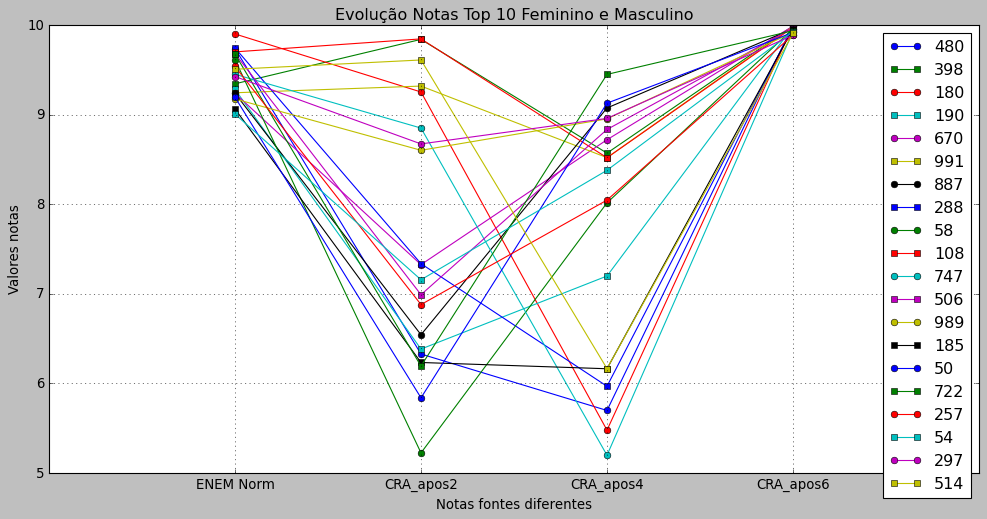

In [13]:
print('Foi criada coluna ENEM Norm com as notas do ENEM normalizadas.')
dataframe['ENEM Norm']=norm

print('top 10 ENEM Norm Feminino') #poderia ter pegado a coluna ENEM Norm
notaFemininoEnem=dataframe[dataframe['Sexo']=='F']['ENEM'].sort_values(ascending=False)[:10]
#print(notaFemininoEnem)
norm_notaFemininoEnem=(notaFemininoEnem/notaFemininoEnem.abs().max())*5+5
#print(norm_notaFemininoEnem)

print('Topo 10 ENEM Norm Masculino') #poderia ter pegado a coluna ENEM Norm
notaMasculinoEnem=dataframe[dataframe['Sexo']=='M']['ENEM'].sort_values(ascending=False)[:10]
#print(notaMasculinoEnem)
norm_notaMasculinoEnem=(notaMasculinoEnem/notaMasculinoEnem.abs().max())*5+5
#print(norm_notaMasculinoEnem)

print('Mostre os 10 alunos do sexo feminino com as maiores notas no CRA6.')
cra6Feminino=dataframe[dataframe['Sexo']=='F']['CRA_apos6'].sort_values(ascending=False)[:10]
#print(cra6Feminino)

print('Mostre os 10 alunos do sexo masculino com as maiores notas no CRA6.')
cra6Masculino=dataframe[dataframe['Sexo']=='M']['CRA_apos6'].sort_values(ascending=False)[:10]
#print(cra6Masculino)

print('Slice do dataframe com as 10 Femininos com maiores notas no CRA6.')
loc10Feminino=cra6Feminino.index
#print(loc10Feminino)
#print(dataframe.loc[loc10Feminino,('ENEM','ENEM Norm','CRA_apos2','CRA_apos4','CRA_apos6')])
sliceTop10Feminino = dataframe.loc[loc10Feminino,('ENEM Norm','CRA_apos2','CRA_apos4','CRA_apos6')]
#print(sliceTop10Feminino)
#print(sliceTop10Feminino.index)

print('Slice do dataframe com as 10 Masculinos com maiores notas no CRA6.')
#locMasc=dataframe[dataframe['Sexo']=='M'].loc[dataframe['CRA_apos6'].idxmax()]
loc10Masc=cra6Masculino.index
#print(loc10Masc)
#print(dataframe.loc[loc10Masc,('ENEM','ENEM Norm','CRA_apos2','CRA_apos4','CRA_apos6')])
sliceTop10Masc = dataframe.loc[loc10Masc,('ENEM Norm','CRA_apos2','CRA_apos4','CRA_apos6')]
#print(sliceTop10Masc)
#print(sliceTop10Masc.index)
print('Plot grafico de dispersão entre ENEM e CRA_apos6.') 

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('classic')
fig = plt.figure(figsize=(15,7))

for i in range(10):
    plt.plot(sliceTop10Feminino.columns,sliceTop10Feminino.iloc[i], '-o', label=sliceTop10Feminino.index[i])    
    plt.plot(sliceTop10Masc.columns,sliceTop10Masc.iloc[i], '-s', label=sliceTop10Masc.index[i])

plt.xlim(-1, 4)
plt.grid(True)
plt.title('Evolução Notas Top 10 Feminino e Masculino')
plt.xlabel('Notas fontes diferentes')
plt.ylabel('Valores notas')
plt.legend(loc='best')
plt.show()
